# Analisis de imagenes con el torax
---

Sistema de reconocimiento utilizando el método eigen vectores  que ha aprendido en
clase. Recibirá un conjunto de imágenes de entrenamiento M y otro conjunto de imágenes de prueba. Usar el entrenamiento
Imágenes para producir un conjunto de eigen vectores. Luego, reconozca el torax en la imagen de entrada usando la máscara propia
método. Use la distancia euclidiana como medida de distancia para calcular $ d_i $, para i = 0 a M. Puede
elija manualmente los umbrales $ T_0 $ y $ T_1 $ que producen los mejores resultados.

Qué entregar:
+ Un ** archivo MS Words ** que contiene su ** código fuente ** (con comentarios completos y documentación), el ** lenguaje y el compilador ** utilizados, ** instrucciones sobre cómo compilar y ejecutar ** su programa, y lo siguiente:
    - Los umbrales elegidos manualmente $ T_0 $ y $ T_1 $, la cara media m y las interfaces propias. Las eigenfaces están contenidas en la matriz U, con cada columna representa una eigenface. Puede generar cada interfaz propia como una imagen N $ \ veces $ N.
    - Los coeficientes de PCA ($ Ω_i $) para cada imagen de entrenamiento.
    - Para cada imagen de prueba: la imagen después de restar la cara media I, sus coeficientes PCA ($ Ω_i $), la imagen facial reconstruida ($ I_R $), las distancias $ d_i $ para i = 0 a M y el resultado de la clasificación (no -facial, cara desconocida, o identificador de cara.)

+ ** Su código ejecutable **, los archivos originales de ** imagen de salida ** como se describe en (a) arriba como archivos individuales.

<hr>

In [101]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

## Read Images

In [108]:
dataset_path = 'data_torax/'
dataset_dir  = os.listdir(dataset_path)

width  = 1024
height = 1024

Train Images:


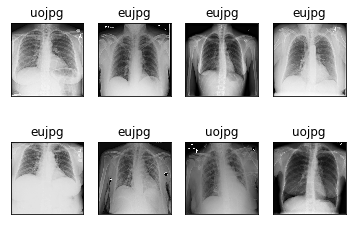

Test Images:
17


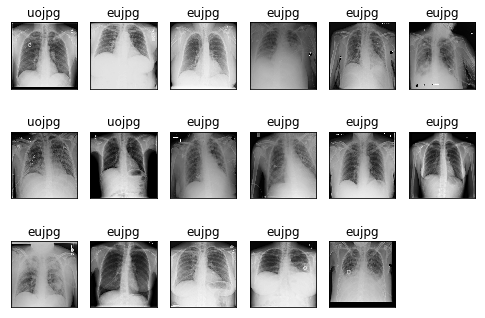

In [111]:
print('Train Images:')
train_image_names = ['1sneu.jpg', '2sneu.jpg', '3sneu.jpg', '4sneu.jpg', '5sneu.jpg', '6sneu.jpg', '7sneu.jpg', '8sneu.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)
print ((len(test_image_names)))
for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Torax medio


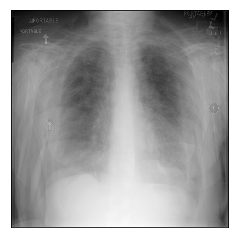

In [112]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Torax normalizado

In [148]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Mostrar torax normalizado

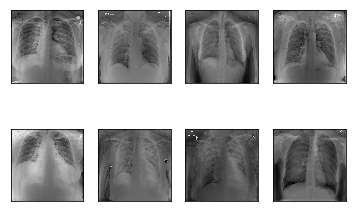

In [146]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance matrix

In [115]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[126.14638932  10.139828   -59.05891795  12.46535804  34.93758236
  -28.66445789 -36.57484825 -59.39093363]
 [ 10.139828   156.99730434 -44.25008826  19.00155574 -47.38654604
  -31.56781671 -23.77348666 -39.16075041]
 [-59.05891795 -44.25008826 245.29324157 -58.92884809 -81.1250304
   10.18676811   2.77819408 -14.89531906]
 [ 12.46535804  19.00155574 -58.92884809  87.54436126  -4.53925528
  -26.71032578 -13.67612553 -15.15672037]
 [ 34.93758236 -47.38654604 -81.1250304   -4.53925528 187.89280644
  -36.24158673 -19.51661658 -34.02135377]
 [-28.66445789 -31.56781671  10.18676811 -26.71032578 -36.24158673
  106.99849636  27.95314943 -21.95422678]
 [-36.57484825 -23.77348666   2.77819408 -13.67612553 -19.51661658
   27.95314943  70.20124844  -7.39151493]
 [-59.39093363 -39.16075041 -14.89531906 -15.15672037 -34.02135377
  -21.95422678  -7.39151493 191.97081895]]


In [116]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.36323721 -0.35355339 -0.24254433  0.13023461  0.20497866  0.24269414
  -0.70381901  0.2664433 ]
 [-0.16876498 -0.35355339 -0.45119215 -0.57556877  0.11346833 -0.04948604
   0.44718494  0.31042925]
 [ 0.70781955 -0.35355339 -0.28468095  0.30919169  0.43019177 -0.06077082
   0.04036489 -0.08343479]
 [-0.21195451 -0.35355339 -0.04978556 -0.21921349 -0.00139743 -0.24877163
  -0.13896246 -0.83566877]
 [-0.45768148 -0.35355339  0.26033097  0.58113837  0.16638763 -0.14758666
   0.45412616  0.06585137]
 [ 0.17865603 -0.35355339 -0.04265273  0.11509676 -0.70184035 -0.49665977
  -0.15884746  0.25205591]
 [ 0.12159637 -0.35355339  0.04748493  0.05208807 -0.4355531   0.77738984
   0.18882275 -0.15984627]
 [ 0.19356623 -0.35355339  0.76303981 -0.39296724  0.22376448 -0.01680906
  -0.12886982  0.18416999]]

Eigenvalues of Cov(X): 
[3.55228657e+02 1.77973285e-11 2.29711401e+02 2.15283158e+02
 1.47115553e+02 5.04618410e+01 9.54777994e+01 7.97662570e+01]


In [117]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## Encontrar la varianza acumulada de cada componente principal

Cumulative proportion of variance explained vector: 
[0.3028262  0.49865114 0.68217625 0.80758968 0.88898283 0.95698217
 1.         1.        ]


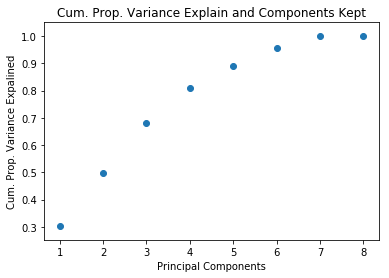

In [118]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Elija el número necesario de componentes principales:

In [119]:
reduced_data = np.array(eigvectors_sort[:7]).transpose()

Ahora intentamos encontrar los datos proyectados. Esto formará el espacio propio.

In [120]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

## Trazos de eigen torax


7


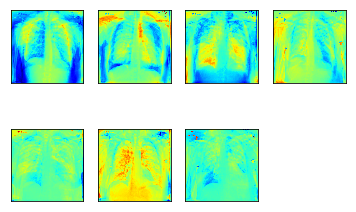

In [154]:
print(proj_data.shape[0])
i=0
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Encontrar pesos para cada imagen de entrenamiento.

In [122]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-2.79979132e+09, -6.56037186e+08,  9.42605071e+08,
         6.65053406e+08, -4.73412673e+08, -3.68021022e+08,
        -3.67379313e+08],
       [-2.02776277e+08, -8.36457927e+08, -1.16305682e+09,
         6.80159101e+07,  3.42382421e+08,  3.03185933e+08,
         6.12066101e+07],
       [ 4.36883625e+09, -3.00335951e+08, -3.72386230e+08,
        -1.13035285e+07, -8.64728689e+07,  6.62962683e+08,
         5.92817478e+08],
       [-3.18870895e+09, -3.76847156e+08,  6.57417871e+08,
         6.11858200e+08,  2.31442723e+07, -1.37259096e+09,
        -8.05281059e+08],
       [-5.60327771e+09,  3.59206178e+07,  2.79576355e+09,
         1.22259920e+09,  5.86614262e+08, -1.30451302e+09,
        -1.22296536e+09],
       [ 1.92845782e+09,  7.11775774e+07, -3.67206192e+08,
        -1.20112950e+09, -2.00625568e+08,  6.12755097e+08,
         1.71921571e+08],
       [ 2.40331901e+09,  3.15713809e+08, -7.46632646e+08,
        -1.02724883e+09,  4.39263813e+07,  5.42281415e+08,
         8.8776253

## Ahora reconocemos el torax desconocida!

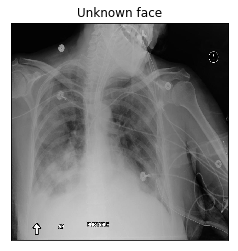

In [123]:
unknown_face        = plt.imread('data_torax/1neu.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalizar el torax desconocido

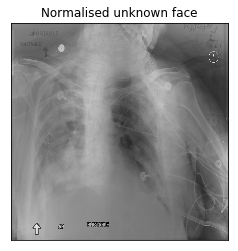

In [132]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Pesos del torax desconocido

Proyectando el vector normalizado en el espacio propio, para averiguar los pesos:

In [133]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-7.91566929e+09, -1.48468018e+09,  3.21402905e+09,  2.28157811e+09,
        2.49111306e+08, -2.07854333e+09, -2.28533139e+09])

BUscando el  $min|W - W_{unknown}|$

In [134]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[6.46203090e+09 9.75475389e+09 1.36507744e+10 5.96956047e+09
 3.28594229e+09 1.17373537e+10 1.23829505e+10 1.34582603e+10]


3285942286.167661

## Reconociendo todas las imágenes de prueba

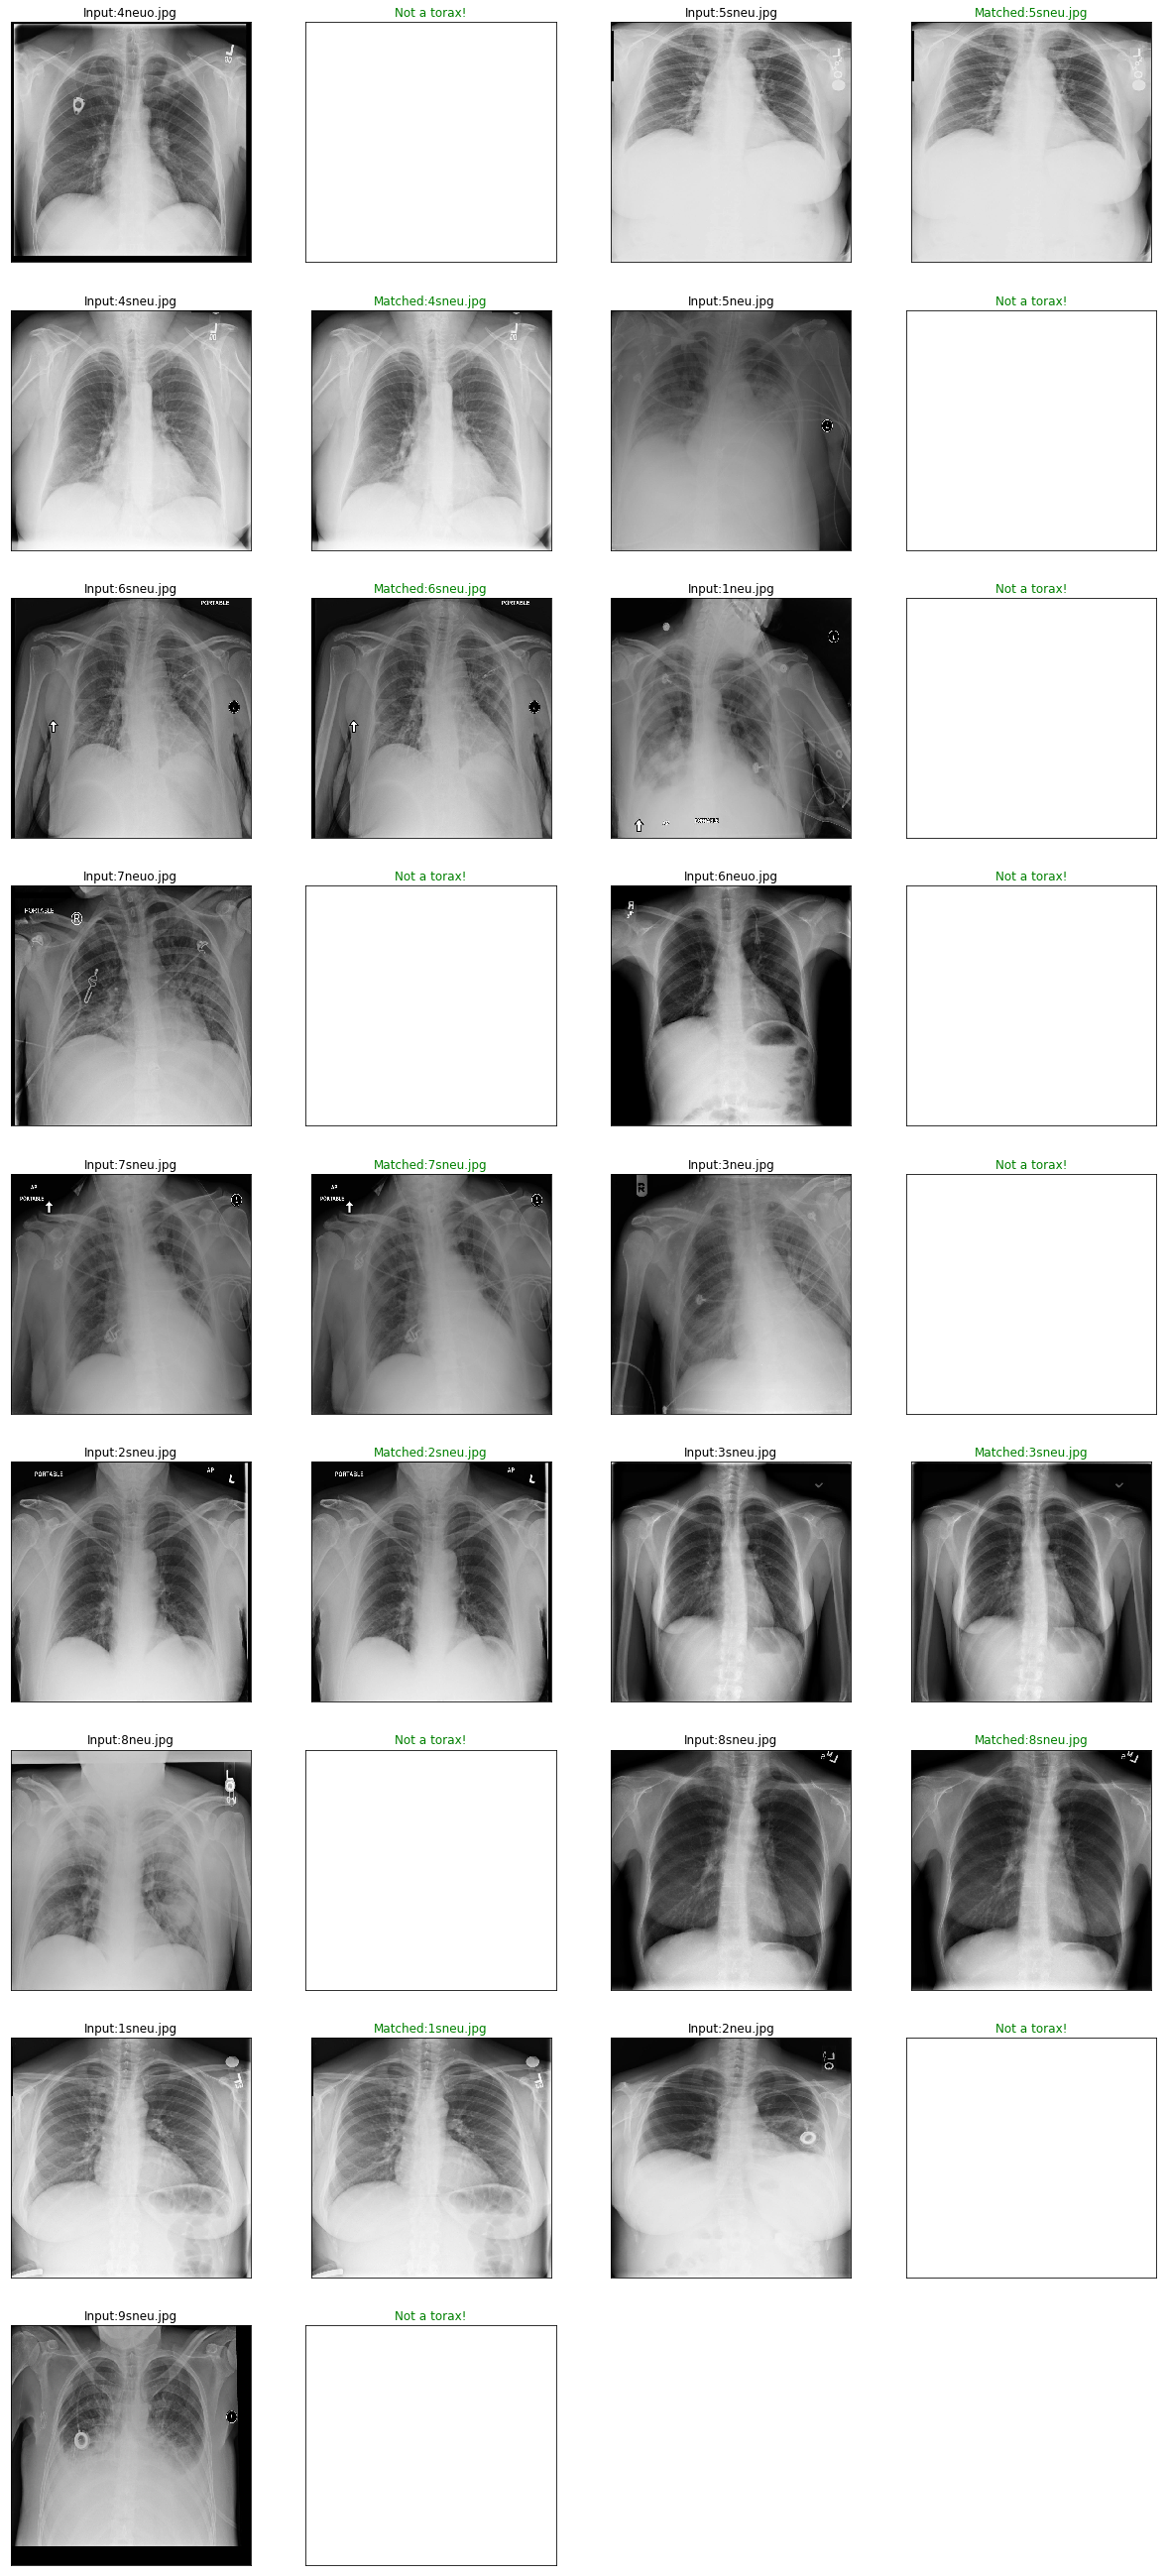

Correct predictions: 17/17 = 100.0%


In [149]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread('data_torax/'+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread('data_torax/'+train_image_names[index]), cmap='gray')
                
                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread('data_torax/'+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown torax!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown torax!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:     
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a torax!', color='r')
        else:
            plt.title('Not a torax!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, num_images, correct_pred/num_images*100.00))

## Normalised images

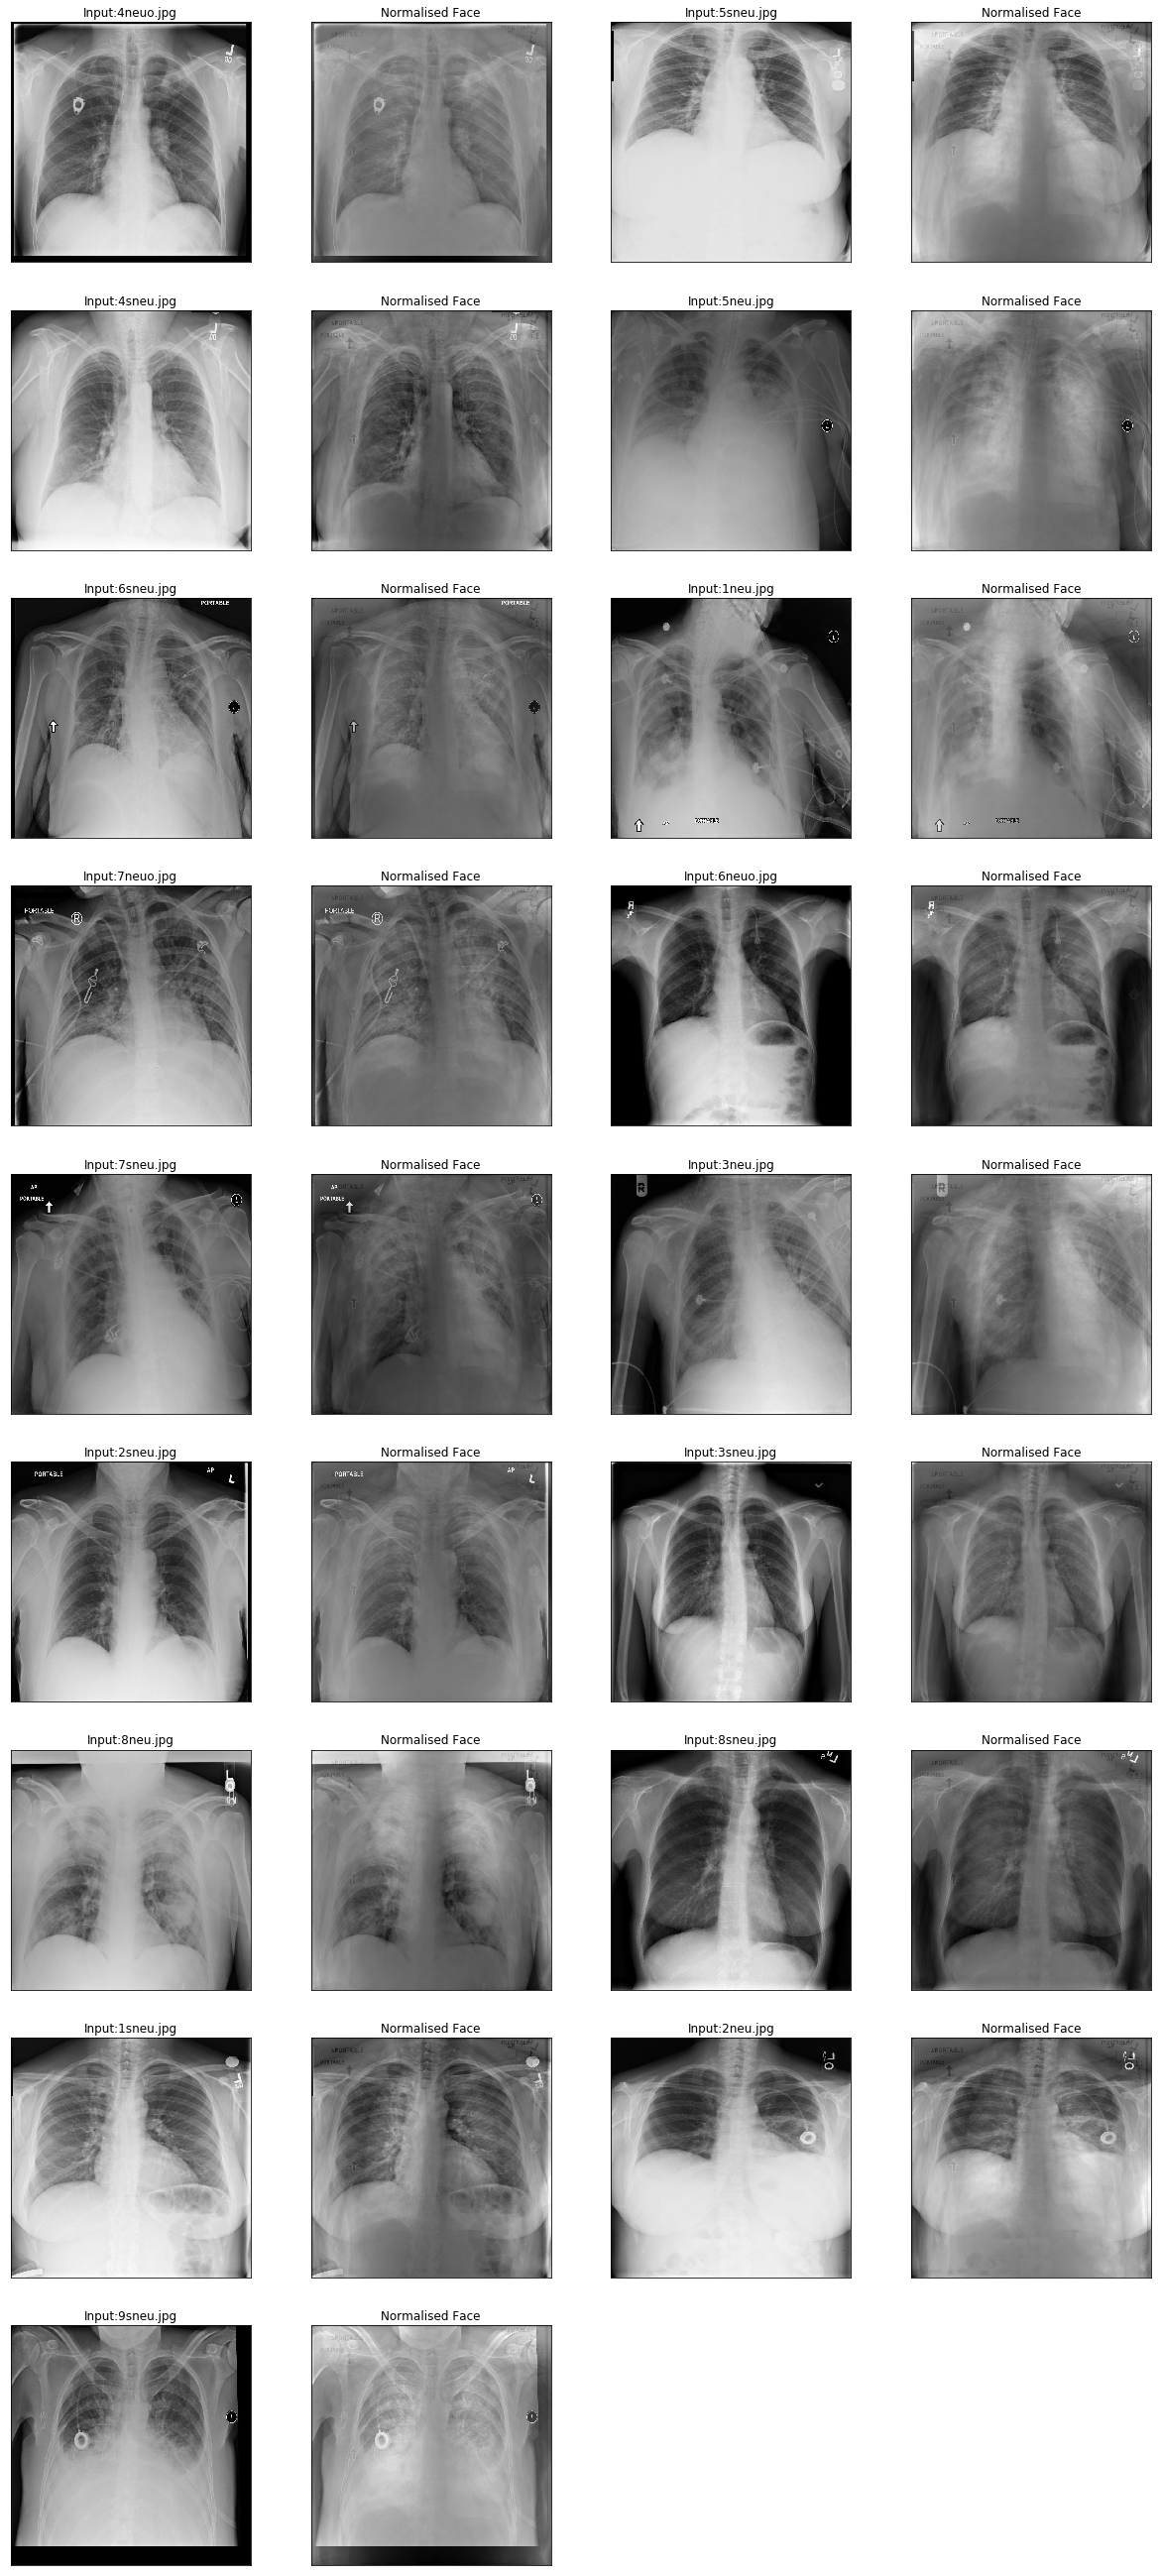

In [137]:
count        = 0
def recogniser(img, train_image_names,proj_data,w):
    global count
    unknown_face        = plt.imread('data_torax/'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    plt.subplot(9,4,1+count)
    plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
    plt.title('Normalised torax')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=2.5)
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()